# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Penguin Short (from MP VII) ##
Telemetry collected from a Magellanic penguin. The full data consists of 1,048,575 data points recorded at 40 Hz (about 7.2 hours). We focus on the X-Axis acceleration (the direction of travel for a swimming bird). 

m = 28 (~0.7 s) (MP VII) (worst)

m = 25 (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 20 (own research, interesting results!)

In [2]:
# Parameter
use_case = "chains"
data_name = "penguinshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "penguinshort")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation
# same data from Robustness Paper:
# data_name = "penguin2022"
# T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "ts")


### Experiments ###

In [3]:
# Hyperparameter
target_w = 25
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = True # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5]


In [4]:
# calculate:
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Running Experiment: target_w=25, m=None, offset=False, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=25, m=25, d=1, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=25, m=13, d=2, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=25, m=9, d=3, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=25, m=7, d=4, offset=0, groundtruthD1=True, nonoverlapping=True
Calculated MP for: w=26, m=6, d=5, offset=0, groundtruthD1=True, nonoverlapping=True


Visualizing Experiment: target_w=25, m=None, offset=False, groundtruthD1=True, nonoverlapping=True
chain for d=1, m=25, w=25: [239 278 337 477]
chain for d=2, m=13, w=25: [174 212 251 290 349 510]
chain for d=3, m=9, w=25: [278 337 579 640 722 842]
chain for d=4, m=7, w=25: [243 282 322 563 603]
chain for d=5, m=6, w=26: [ 22 319 699 779]


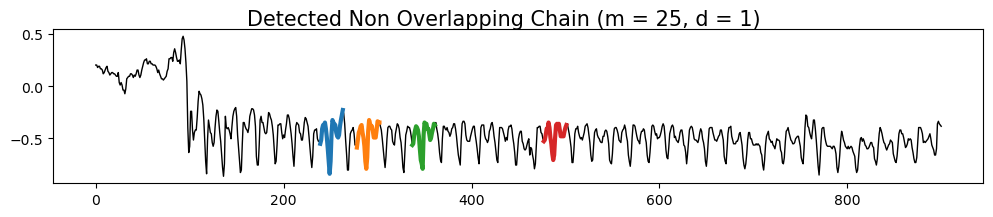

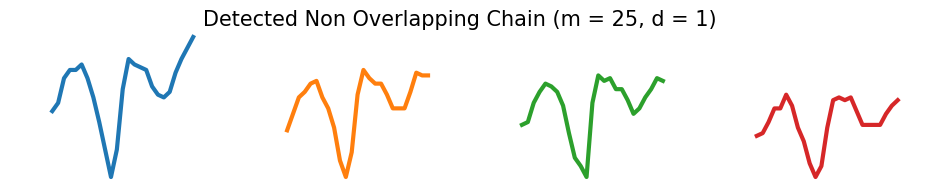

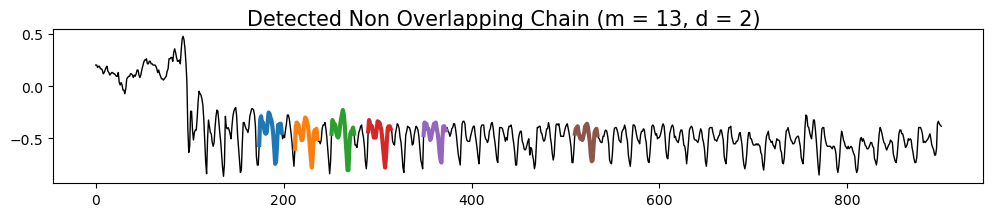

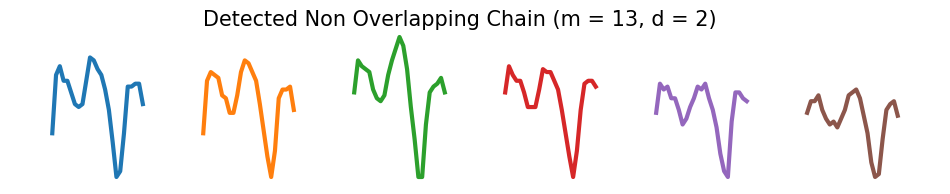

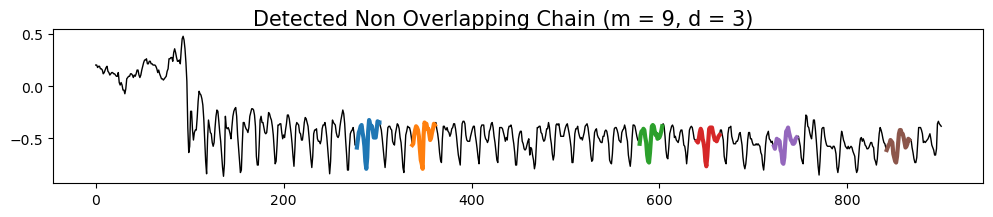

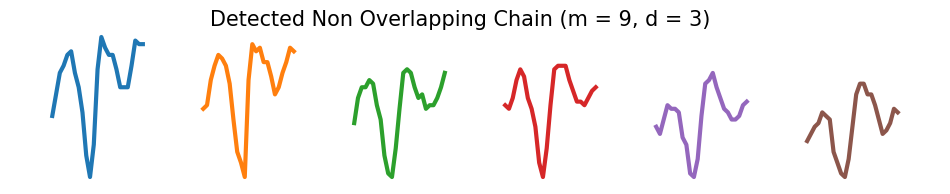

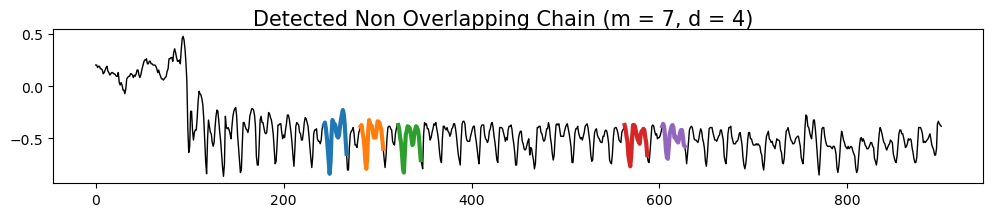

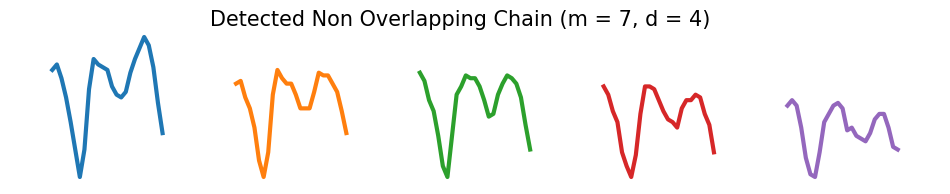

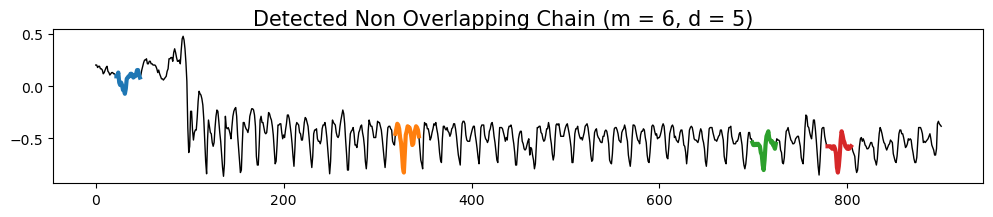

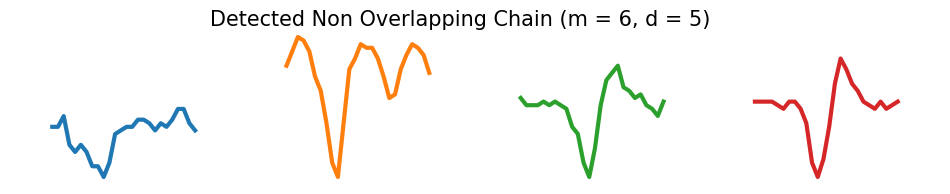

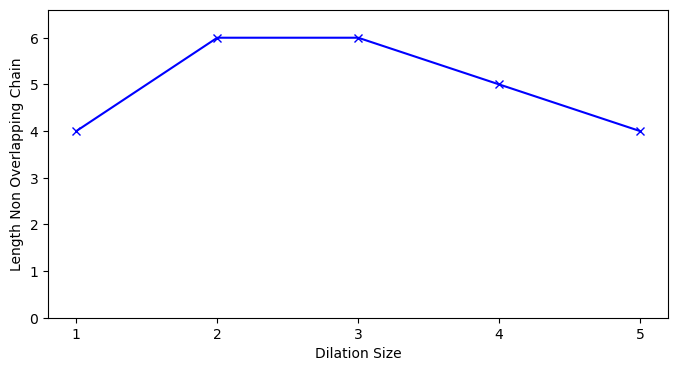

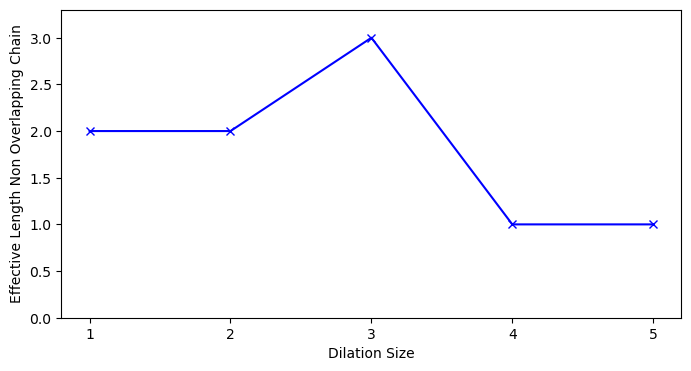

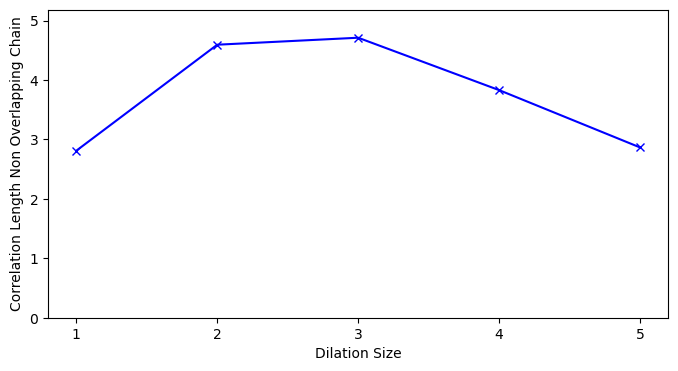

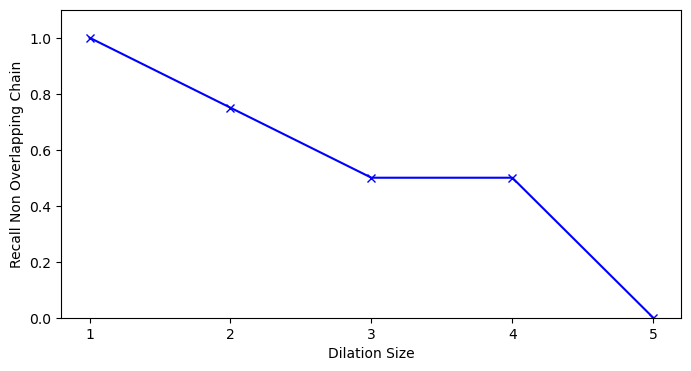

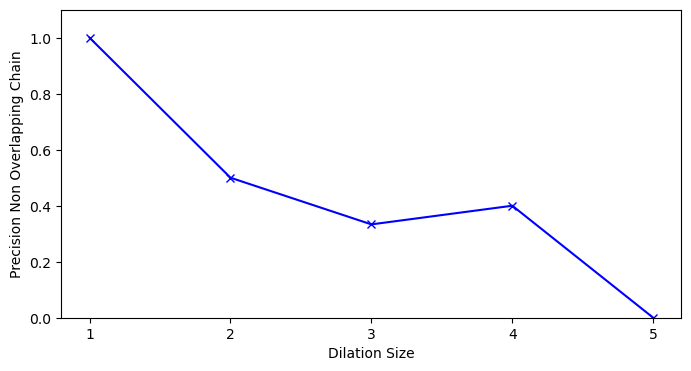

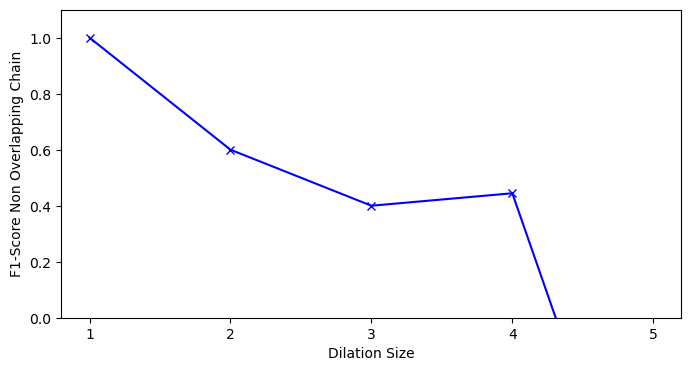

In [5]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)